<a href="https://colab.research.google.com/github/kemalthoriq/car-rental-app/blob/master/sentiment_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
!pip install pandas

## 1. Crawling Data BPJS Twitter

In [168]:
# # Crawl Data Twitter BPJS

# filename = "bpjs_tweets.csv"
# search_keyword = "bpjs"

# limit = 1000

# !npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} -- token

# ## Token Tweet : 47705bcd5b4dda8552a013d385f29339133ca7a4

## 2. Output Data Komentar BPJS di Twitter

In [99]:
import pandas as pd

filename = "bpjs_tweets.csv"

file_path = f"tweets-data/{filename}"

df = pd.read_csv(file_path, delimiter=",")

display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1879836598491373693,Thu Jan 16 15:01:17 +0000 2025,83,@KangManto123 Si kontil ama pegawai BPJS aja k...,1879906777279729751,https://pbs.twimg.com/media/GhbFQF3bIAA6aus.jpg,KangManto123,in,NaN,2,6,24,https://x.com/rimba890/status/1879906777279729751,2700582162,rimba890
1,1877878634352189575,Sat Jan 11 00:42:23 +0000 2025,285,Apa yang salah dengan sistem BPJS kita?‍️ http...,1877878689352094137,https://pbs.twimg.com/media/Gg-QtWAbcAA0ziJ.jpg,eexxoo_7,in,"DKI Jakarta, Indonesia",6,13,46,https://x.com/eexxoo_7/status/1877878689352094137,2511596892,eexxoo_7
2,1879802051926061492,Thu Jan 16 08:05:08 +0000 2025,341,BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...,1879802051926061492,https://pbs.twimg.com/media/GhZl7eiakAA5l1i.jpg,NaN,in,Jakarta,182,486,148,https://x.com/kompascom/status/187980205192606...,23343960,kompascom
3,1877710820307530029,Fri Jan 10 15:50:21 +0000 2025,580,@worksfess Stop bilang kalo bpjs adalah benefi...,1877744797366280528,NaN,worksfess,in,"Yogyakarta, Indonesia",0,5,12,https://x.com/rnrfkhri/status/1877744797366280528,1642806133,rnrfkhri
4,1879514323955126431,Wed Jan 15 13:01:49 +0000 2025,2,Ngantri berobat 3 jam cuma buat nunggu nama di...,1879514323955126431,NaN,NaN,in,NaN,0,0,0,https://x.com/bendol30/status/1879514323955126431,114376538,bendol30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1876999023636238544,Fri Jan 10 04:04:55 +0000 2025,0,@masihadaa Salam Sehat Sahabat. Mohon maaf jik...,1877567269896859772,NaN,masihadaa,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187756726...,1522337929,BPJSKesehatanRI
527,1877530215720824970,Fri Jan 10 03:19:48 +0000 2025,0,@naastarry Salam. Prosedur untuk penonaktifan ...,1877555918528774438,NaN,naastarry,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187755591...,1522337929,BPJSKesehatanRI
528,1877530215720824970,Fri Jan 10 03:20:43 +0000 2025,0,@naastarry Sahabat dapat melakukan pelaporan s...,1877556146124337161,NaN,naastarry,in,Indonesia,0,0,0,https://x.com/BPJSKesehatanRI/status/187755614...,1522337929,BPJSKesehatanRI
529,1877656194497511903,Fri Jan 10 09:58:16 +0000 2025,1,mau kemana lagi gue nyari sisaan buat bayar bp...,1877656194497511903,NaN,NaN,in,NaN,0,0,0,https://x.com/madmaxeugene/status/187765619449...,620046357,madmaxeugene


## 3. Jumlah Frame Data

In [100]:
num_tweets = len(df)

print(f"Jumlah tweet dalam dataframe adalah {num_tweets}")

Jumlah tweet dalam dataframe adalah 531


## 4. Preproccessing Data

4.1 Clean Text Data

In [137]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Fungsi membersihkan teks
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    return " ".join([word for word in tokens if word not in stop_words])

if 'text' in df.columns:
    df['cleaned_text'] = df['text'].apply(clean_text)
elif 'tweet' in df.columns:
    df['cleaned_text'] = df['tweet'].apply(clean_text)
    print("Using 'tweet' column instead of 'text'")
elif 'full_text' in df.columns:
    df['cleaned_text'] = df['full_text'].apply(clean_text)
    print("Using 'full_text' column instead of 'text'")
else:
    raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text'.")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using 'full_text' column instead of 'text'


##4.2 Tokenize
 -memisahkan kalimat menjadi kata2 atau bagian tertentu
 -ex : produk ini bagus [produk',"ini",'bagus']

In [138]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['cleaned_text'])

X = tokenizer.texts_to_sequences(df['cleaned_text'])

In [103]:
tokenized = df_copy['favorite_count'].apply(lambda x: str(x).split())
tokenized.head()

,favorite_count
0,[83]
1,[285]
2,[341]
3,[580]
4,[2]


##4.3 Stemming

memperkecil jumlah indeks yg berbeda dari 1 data

In [104]:
!pip install Sastrawi

In [163]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

file_path = "tweets-data/bpjs_tweets.csv"
df = pd.read_csv(file_path)


# Check if 'cleaned_text' column exists, if not, create it
if 'cleaned_text' not in df.columns:
    # Assuming you have the clean_text function defined in your environment
    import re
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords

    # Fungsi membersihkan teks
    def clean_text(text):
        text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'[^A-Za-z\s]', '', text)
        text = text.lower()
        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('indonesian'))
        return " ".join([word for word in tokens if word not in stop_words])

    # Select appropriate text column for cleaning
    if 'text' in df.columns:
        df['cleaned_text'] = df['text'].apply(clean_text)
    elif 'tweet' in df.columns:
        df['cleaned_text'] = df['tweet'].apply(clean_text)
        print("Using 'tweet' column instead of 'text'")
    elif 'full_text' in df.columns:
        df['cleaned_text'] = df['full_text'].apply(clean_text)
        print("Using 'full_text' column instead of 'text'")
    else:
        raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text'.")

factory = StemmerFactory()
stemmer = factory.create_stemmer()

print("Proses stemming sedang berjalan...")
df['stemmed_text'] = df['cleaned_text'].apply(stemmer.stem)

print("Stemming selesai!")
print("\nContoh hasil stemming:")
print(df[['cleaned_text', 'stemmed_text']].head())

output_file = "tweets-data/bpjs_tweets_stemmed.csv"
df.to_csv(output_file, index=False)
print(f"Hasil stemming disimpan ke file: {output_file}")

Using 'full_text' column instead of 'text'
Proses stemming sedang berjalan...
Stemming selesai!

Contoh hasil stemming:
                                        cleaned_text  \
0  si kontil ama pegawai bpjs aja kaga yg pake bp...   
1                                  salah sistem bpjs   
2  bpjs tanggung pengobatan menkes usul asuransi ...   
3  stop bilang kalo bpjs benefit kewajiban perusa...   
4  ngantri berobat jam nunggu nama dipanggil pas ...   

                                        stemmed_text  
0  si kontil ama pegawai bpjs aja kaga yg pake bp...  
1                                  salah sistem bpjs  
2  bpjs tanggung obat menkes usul asuransi swasta...  
3      stop bilang kalo bpjs benefit wajib usaha btw  
4  ngantri obat jam nunggu nama panggil pas perik...  
Hasil stemming disimpan ke file: tweets-data/bpjs_tweets_stemmed.csv


## 5. Labeling Data

In [164]:
def assign_label(text):
    positif_keywords = ["baik", "jujur", "suka", "senang", "puas"]
    negatif_keywords = ["buruk", "bohong", "marah", "kecewa", "sedih"]
    text = text.lower()
    if any(word in text for word in positif_keywords):
        return 1  # Positif
    elif any(word in text for word in negatif_keywords):
        return 0  # Negatif
    else:
        return 2  # Netral

df['label'] = df['stemmed_text'].apply(assign_label)


## 6. Normalisasi Data

In [166]:
if 'tweet' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['tweet']
elif 'text' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['text']
elif 'full_text' in df.columns:
    df['combined_text'] = df['stemmed_text'] + " " + df['full_text']
else:
    raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text' untuk digabungkan.")

Kolom 'full_text' ditemukan. Menggabungkan teks...
Proses penggabungan teks selesai!

Contoh hasil penggabungan teks:
                                        stemmed_text  \
0  si kontil ama pegawai bpjs aja kaga yg pake bp...   
1                                  salah sistem bpjs   
2  bpjs tanggung obat menkes usul asuransi swasta...   
3      stop bilang kalo bpjs benefit wajib usaha btw   
4  ngantri obat jam nunggu nama panggil pas perik...   

                                       combined_text  
0  si kontil ama pegawai bpjs aja kaga yg pake bp...  
1  salah sistem bpjs Apa yang salah dengan sistem...  
2  bpjs tanggung obat menkes usul asuransi swasta...  
3  stop bilang kalo bpjs benefit wajib usaha btw ...  
4  ngantri obat jam nunggu nama panggil pas perik...  


## 8. Model LSTM

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=50),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 9. Training Model

In [109]:
!pip install scikit-learn

In [146]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 50

X = pad_sequences(X, maxlen=max_length, padding='post', truncating='post')

X = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, df['label'], test_size=0.2, random_state=42
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.7686 - loss: 0.7951 - val_accuracy: 0.9720 - val_loss: 0.1647
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.9734 - loss: 0.1531 - val_accuracy: 0.9720 - val_loss: 0.1465
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9684 - loss: 0.1625 - val_accuracy: 0.9720 - val_loss: 0.1474
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.9781 - loss: 0.1183 - val_accuracy: 0.9720 - val_loss: 0.1468
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9783 - loss: 0.1182 - val_accuracy: 0.9720 - val_loss: 0.1462
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9789 - loss: 0.1147 - val_accuracy: 0.9720 - val_loss: 0.1468
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9826 - loss: 0.0976 - val_accuracy: 0.9720 - val_loss: 0.1481
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9684 - loss: 0.1635 - val_accuracy: 0.

## 10. Evaluasi Model

10.1 Classification Report

In [147]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step
              precision    recall  f1-score   support

     Negatif       0.00      0.00      0.00         1
      Netral       0.00      0.00      0.00         2
     Positif       0.97      1.00      0.99       104

    accuracy                           0.97       107
   macro avg       0.32      0.33      0.33       107
weighted avg       0.94      0.97      0.96       107



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


10.2 Confusion Matrix

<Axes: >

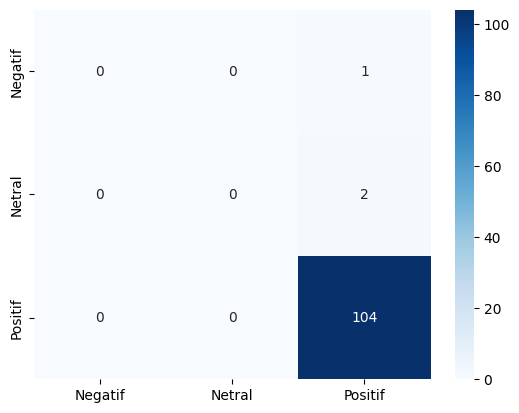

In [148]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])


10.3 Visualisasi Peforma Model

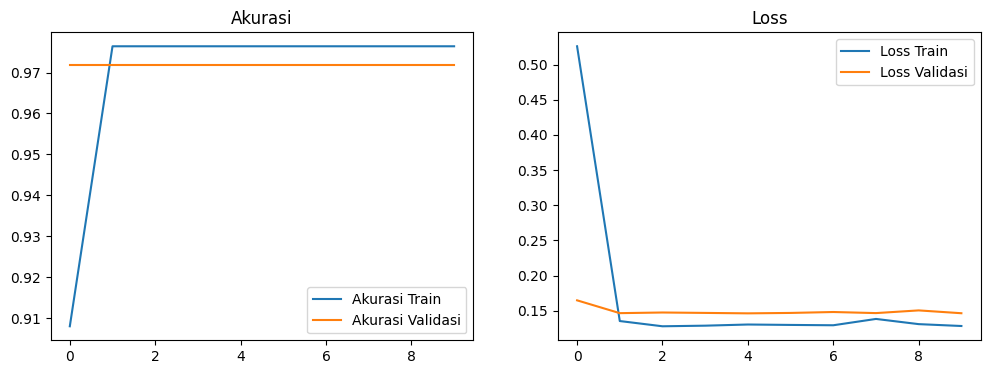

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Train')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.legend()
plt.title('Akurasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Train')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.legend()
plt.title('Loss')
plt.show()

## 11. Plot Akurasi & Loss Data

In [167]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Score", loss)
print("Test Accuracy", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9815 - loss: 0.1061
Test Score 0.1463826298713684
Test Accuracy 0.9719626307487488


## 12. Labeling Data

In [151]:
df_copy = df.copy()

In [152]:
label = []
for _, row in df.iterrows():
    if row["favorite_count"] > 50 and row["retweet_count"] > 20 and row["reply_count"] > 10:
        label.append(1)
    else:
        label.append(0)

df["label"] = label


In [153]:
df_copy.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,cleaned_text,stemmed_text,label,combined_text
0,1879836598491373693,Thu Jan 16 15:01:17 +0000 2025,83,@KangManto123 Si kontil ama pegawai BPJS aja k...,1879906777279729751,https://pbs.twimg.com/media/GhbFQF3bIAA6aus.jpg,KangManto123,in,NaN,2,6,24,https://x.com/rimba890/status/1879906777279729751,2700582162,rimba890,si kontil ama pegawai bpjs aja kaga yg pake bp...,si kontil ama pegawai bpjs aja kaga yg pake bp...,2,si kontil ama pegawai bpjs aja kaga yg pake bp...
1,1877878634352189575,Sat Jan 11 00:42:23 +0000 2025,285,Apa yang salah dengan sistem BPJS kita?‍️ http...,1877878689352094137,https://pbs.twimg.com/media/Gg-QtWAbcAA0ziJ.jpg,eexxoo_7,in,"DKI Jakarta, Indonesia",6,13,46,https://x.com/eexxoo_7/status/1877878689352094137,2511596892,eexxoo_7,salah sistem bpjs,salah sistem bpjs,2,salah sistem bpjs Apa yang salah dengan sistem...
2,1879802051926061492,Thu Jan 16 08:05:08 +0000 2025,341,BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...,1879802051926061492,https://pbs.twimg.com/media/GhZl7eiakAA5l1i.jpg,NaN,in,Jakarta,182,486,148,https://x.com/kompascom/status/187980205192606...,23343960,kompascom,bpjs tanggung pengobatan menkes usul asuransi ...,bpjs tanggung obat menkes usul asuransi swasta...,2,bpjs tanggung obat menkes usul asuransi swasta...
3,1877710820307530029,Fri Jan 10 15:50:21 +0000 2025,580,@worksfess Stop bilang kalo bpjs adalah benefi...,1877744797366280528,NaN,worksfess,in,"Yogyakarta, Indonesia",0,5,12,https://x.com/rnrfkhri/status/1877744797366280528,1642806133,rnrfkhri,stop bilang kalo bpjs benefit kewajiban perusa...,stop bilang kalo bpjs benefit wajib usaha btw,2,stop bilang kalo bpjs benefit wajib usaha btw ...
4,1879514323955126431,Wed Jan 15 13:01:49 +0000 2025,2,Ngantri berobat 3 jam cuma buat nunggu nama di...,1879514323955126431,NaN,NaN,in,NaN,0,0,0,https://x.com/bendol30/status/1879514323955126431,114376538,bendol30,ngantri berobat jam nunggu nama dipanggil pas ...,ngantri obat jam nunggu nama panggil pas perik...,2,ngantri obat jam nunggu nama panggil pas perik...


## 13. Labeling Data Per Kalimat

In [161]:
import pandas as pd
import string
import re

# Baca dataset
df = pd.read_csv("tweets-data/bpjs_tweets.csv")

# Daftar kata kunci sentimen
negative_keywords = ["jelek", "gagal", "buruk", "salah", "benci", "lambat", "tidak puas", "kecewa", "mencekam"]
neutral_keywords = ["oke", "cukup", "biasa", "standar", "lumayan"]
positive_keywords = ["bagus", "sukses", "luar biasa", "hebat", "senang", "puas", "memuaskan", "terbaik"]

# Fungsi preprocessing teks
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Hapus URL
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi ekstra
    return text.lower()

# Fungsi untuk label sentimen
def label_sentiment(text):
    if not text:
        return "Tidak Diketahui"

    text = preprocess_text(text)

    if any(word in text for word in negative_keywords):
        return "Negatif"
    elif any(word in text for word in neutral_keywords):
        return "Netral"
    elif any(word in text for word in positive_keywords):
        return "Positif"
    else:
        return "Tidak Diketahui"

# Tentukan kolom teks
if 'tweet' in df.columns:
    text_column = 'tweet'
elif 'text' in df.columns:
    text_column = 'text'
elif 'full_text' in df.columns:
    text_column = 'full_text'
else:
    raise KeyError("Tidak ada kolom 'text', 'tweet', atau 'full_text' yang ditemukan.")

# Proses sentimen
df["hasil_sentimen"] = df[text_column].apply(label_sentiment)

# Hitung persentase sentimen
sentiment_counts = df["hasil_sentimen"].value_counts(normalize=True) * 100

# Tampilkan hasil persentase
print("Persentase Sentimen:")
print(sentiment_counts)

# Simpan hasil ke file baru
df.to_csv("/content/sentiment_analysis_labels.csv", index=False)

print("\nContoh DataFrame dengan Sentimen:")
print(df.head())


Persentase Sentimen:
hasil_sentimen
Tidak Diketahui    87.570621
Netral              5.838041
Negatif             5.084746
Positif             1.506591
Name: proportion, dtype: float64

Contoh DataFrame dengan Sentimen:
   conversation_id_str                      created_at  favorite_count  \
0  1879836598491373693  Thu Jan 16 15:01:17 +0000 2025              83   
1  1877878634352189575  Sat Jan 11 00:42:23 +0000 2025             285   
2  1879802051926061492  Thu Jan 16 08:05:08 +0000 2025             341   
3  1877710820307530029  Fri Jan 10 15:50:21 +0000 2025             580   
4  1879514323955126431  Wed Jan 15 13:01:49 +0000 2025               2   

                                           full_text               id_str  \
0  @KangManto123 Si kontil ama pegawai BPJS aja k...  1879906777279729751   
1  Apa yang salah dengan sistem BPJS kita?‍️ http...  1877878689352094137   
2  BPJS Tak Bisa Tanggung Semua Pengobatan Menkes...  1879802051926061492   
3  @worksfess Stop bilang k